In [1]:
import gym
import numpy as np
from tqdm import tqdm
from nstep_sarsa_off_policy import run_nstep_sarsa_offPolicy, run_nstep_sarsa_offPolicy_control_variate, run_nstep_sarsa_offPolicy_steps, run_nstep_sarsa_offPolicy_control_variate_steps
from nstep_sarsa import run_nstep_sarsa, run_nstep_sarsa_step
from wrappers import DiscreteObservationWrapper
from plot_graph import moving_mean_plot, save_results, load_results, moving_mean_plot_many

### SARSA off-policy n-steps

In [2]:
# Melhores parâmetros para o sarsa off-policy

ENV_NAME = "CartPole-v1"
STEPS = 200_000
LR = 0.4332311032873412
GAMMA = 0.8488928377337801
EPSILON = 1
NSTEPS = 68
B1 = 1
B2= 69
B3= 13
B4 = 68

env = gym.make(ENV_NAME)
env = DiscreteObservationWrapper(env, [B1,B2,B3,B4])

c:\Users\gmaia\anaconda3\envs\rlx\lib\site-packages\gym\utils\passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(


In [4]:
# on-policy
results_onpolicy = []
for execution in tqdm(range(20)):
    all_return = run_nstep_sarsa_step(env, STEPS, NSTEPS, LR, GAMMA, EPSILON)
    results_onpolicy.append(all_return)

100%|██████████| 20/20 [14:15<00:00, 42.80s/it]


In [11]:
# off-policy
results_offpolicy = []
for execution in tqdm(range(20)):
    all_return = run_nstep_sarsa_offPolicy_steps(env, STEPS, NSTEPS, LR, GAMMA, EPSILON)
    results_offpolicy.append(all_return)

100%|██████████| 20/20 [19:37<00:00, 58.85s/it]


In [3]:
#off-policy control variate
results_offpolicy_cv = []
for execution in tqdm(range(20)):
    all_return = run_nstep_sarsa_offPolicy_control_variate_steps(env, STEPS, NSTEPS, LR, GAMMA, EPSILON)
    results_offpolicy_cv.append(all_return)

100%|██████████| 20/20 [22:51<00:00, 68.57s/it]


In [4]:
results_offpolicy_cv = np.array(results_offpolicy_cv)

In [5]:
save_results("cartpole-1-2.npy", results_offpolicy_cv)

In [ ]:
for i in range(1000, STEPS+1, 10_000):
    moving_mean_plot(results_offpolicy.mean(axis=0), 200_000, i, 1)

### SARSA off-policy n-steps control variate

In [6]:
# Melhores parâmetros para o sarsa off-policy control variate

ENV_NAME = "CartPole-v1"
STEPS = 200_000
LR = 0.11422703163526324
GAMMA = 0.6892685851849248
EPSILON = 1
NSTEPS = 5
B1 = 7
B2= 34
B3= 95
B4 = 84

env = gym.make(ENV_NAME)
env = DiscreteObservationWrapper(env, [B1,B2,B3,B4])

c:\Users\gmaia\anaconda3\envs\rlx\lib\site-packages\gym\utils\passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(


In [11]:
# on-policy
results_onpolicy = []
for execution in tqdm(range(20)):
    all_return = run_nstep_sarsa_step(env, STEPS, NSTEPS, LR, GAMMA, EPSILON)
    results_onpolicy.append(all_return)

100%|██████████| 20/20 [12:47<00:00, 38.37s/it]


In [3]:
#off-policy control variate
results_offpolicy_cv = []
for execution in tqdm(range(20)):
    all_return = run_nstep_sarsa_offPolicy_control_variate_steps(env, STEPS, NSTEPS, LR, GAMMA, EPSILON)
    results_offpolicy_cv.append(all_return)

100%|██████████| 20/20 [27:44<00:00, 83.24s/it]


In [12]:
results_onpolicy = np.array(results_onpolicy)

In [5]:
results_offpolicy_cv = np.array(results_offpolicy_cv)

In [13]:
save_results(file_name="cartpole-0-2.npy", list_np=results_onpolicy)

In [ ]:
for i in range(1000, STEPS+1, 10_000):
    moving_mean_plot(results_offpolicy_cv.mean(axis=0), 200_000, i, 1)

### Resultados

In [10]:
# off-policy X on-policy
cart_offpolicy = load_results("cartpole-1.npy")
cart_onpolicy = load_results("cartpole-0-1.npy")
cart_offpolicy_cv = load_results("cartpole-2.npy")
cart_onpolicy_cv = load_results("cartpole-0-2.npy")

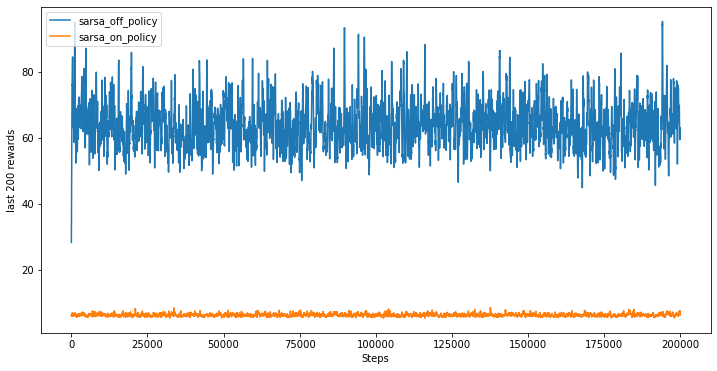

In [13]:
moving_mean_plot_many([cart_offpolicy.mean(axis=0), cart_onpolicy.mean(axis=0)], ['sarsa_off_policy', 'sarsa_on_policy'], 200_000, 200)

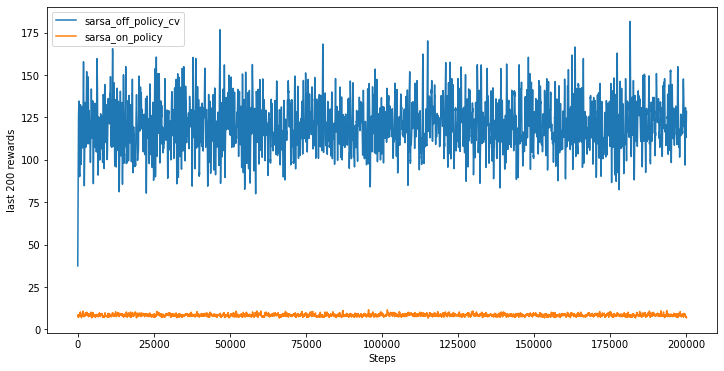

In [14]:
moving_mean_plot_many([cart_offpolicy_cv.mean(axis=0), cart_onpolicy_cv.mean(axis=0)], ['sarsa_off_policy_cv', 'sarsa_on_policy'], 200_000, 200)

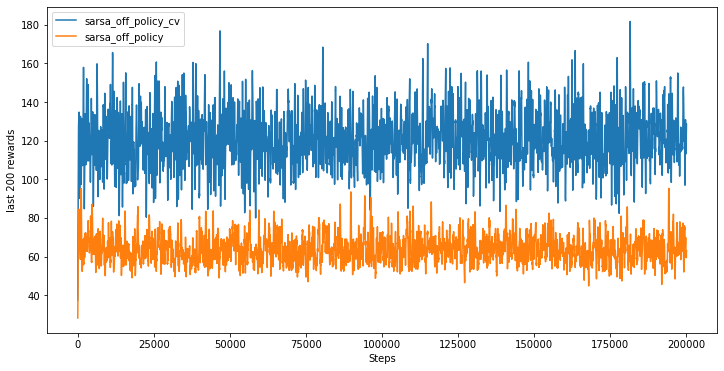

In [9]:
moving_mean_plot_many([cart_offpolicy_cv.mean(axis=0), cart_offpolicy.mean(axis=0)], ['sarsa_off_policy_cv', 'sarsa_off_policy'], 200_000, 200)